In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import xgboost
from sklearn.model_selection import RandomizedSearchCV

In [3]:
sample_submission = pd.read_csv('House_prices_sample_submission.csv')

In [4]:
sample_submission.head()

,Id,SalePrice
0,1461,123214.57
1,1462,163431.23
2,1463,185564.69
3,1464,191928.52
4,1465,216759.12


In [5]:
df = pd.read_csv('House_prices_train.csv')

In [6]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

<AxesSubplot:>

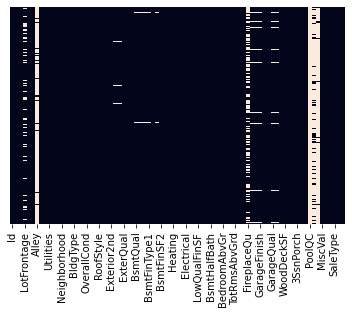

In [8]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False) #shows missing values

In [9]:
df['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [10]:
#Fill Missing Values

df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())

In [11]:
df.drop(['Alley'],axis=1,inplace=True)

In [12]:
df['BsmtCond'] = df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtQual'] = df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])

In [13]:
df['FireplaceQu'] = df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])
df['GarageType'] = df['GarageType'].fillna(df['GarageType'].mode()[0])

In [14]:
df.drop(['GarageYrBlt'],axis=1,inplace=True)

In [15]:
df['GarageFinish'] = df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual'] = df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond'] = df['GarageCond'].fillna(df['GarageCond'].mode()[0])

In [16]:
df.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [17]:
df.drop(['Id'],axis=1,inplace=True)

In [18]:
df.shape

(1460, 75)

In [19]:
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0])
df['MasVnrType'] = df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])

<AxesSubplot:>

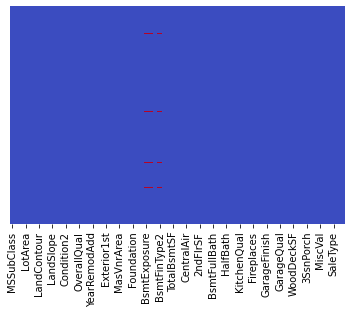

In [20]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='coolwarm') #shows missing values

In [21]:
df['BsmtExposure'] = df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])

<AxesSubplot:>

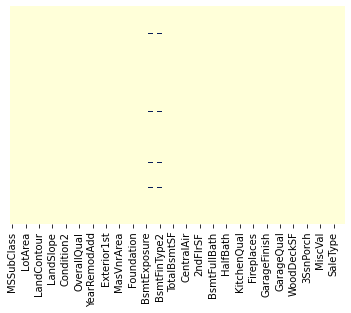

In [22]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')

In [23]:
df['BsmtFinType2'] = df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])

In [24]:
df.dropna(inplace=True)

In [25]:
df.shape

(1422, 75)

In [26]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [27]:
#Handle Categorial Features

In [28]:
columns=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
         'Condition2','BldgType','Condition1','HouseStyle','SaleType',
        'SaleCondition','ExterCond',
         'ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
        'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Heating','HeatingQC',
         'CentralAir',
         'Electrical','KitchenQual','Functional',
         'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive']

In [29]:
len(columns)

39

In [30]:
columns

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition2',
 'BldgType',
 'Condition1',
 'HouseStyle',
 'SaleType',
 'SaleCondition',
 'ExterCond',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive']

In [31]:
def category_onehot_multcols(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final

In [32]:
main_df = df.copy()

In [33]:
#Combine test Data
test_df = pd.read_csv('formulated_test.csv')

In [34]:
test_df.shape

(1459, 74)

In [35]:
test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal


In [36]:
final_df=pd.concat([df,test_df],axis=0) #+

In [37]:
final_df.shape

(2881, 75)

In [38]:
final_df = category_onehot_multcols(columns)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition2
BldgType
Condition1
HouseStyle
SaleType
SaleCondition
ExterCond
ExterQual
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive


In [39]:
final_df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Fa,Gd,Po,TA,Fa,Gd,Po,TA,P,Y
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,1,0,0,0,1,0,1
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,1,0,0,0,1,0,1
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,1,0,0,0,1,0,1
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,1,0,0,0,1,0,1
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,0,0,0,1,0,0,0,1,0,1
1455,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,0,0,0,1,0,0,0,1,0,1
1456,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,0,0,0,1,0,0,0,1,0,1
1457,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,0,0,0,1,0,0,0,1,0,1


In [40]:
final_df.shape

(2881, 235)

In [41]:
final_df = final_df.loc[:,~final_df.columns.duplicated()] #removing those features that strongly correlate with each other

In [42]:
final_df.shape

(2881, 175)

In [43]:
df_Train=final_df.iloc[:1422,:]
df_Test=final_df.iloc[1422:,:]

In [44]:
df_Test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,0,0,1,1,0,0,0,0,0,0
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,0,0,1,1,0,0,0,0,0,0
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,0,0,1,1,0,0,0,0,0,0
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,0,0,1,1,0,0,0,0,0,0
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,0,0,1,1,0,0,0,0,1,0


In [45]:
df_Test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,0,0,1,1,0,0,0,0,0,0
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,0,0,1,1,0,0,0,0,0,0
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,0,0,1,1,0,0,0,0,0,0
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,0,0,1,1,0,0,0,0,0,0
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,0,0,1,1,0,0,0,0,1,0


In [46]:
df_Train.shape

(1422, 175)

In [47]:
df_Test.drop(['SalePrice'],axis=1,inplace=True)

C:\Users\Vlaso\AppData\Local\Temp\ipykernel_12704\3985304647.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Test.drop(['SalePrice'],axis=1,inplace=True)


In [48]:
df_Test.shape

(1459, 174)

In [49]:
X_train=df_Train.drop(['SalePrice'],axis=1)
y_train=df_Train['SalePrice']

In [50]:
classifier=xgboost.XGBRegressor()

In [51]:
classifier.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [52]:
import pickle

In [53]:
filename = 'start_model.pkl'
pickle.dump(classifier, open(filename, 'wb'))

In [54]:
y_pred=classifier.predict(df_Test)

In [55]:
#Create sample submission file and submit
pred = pd.DataFrame(y_pred)
datasets = pd.concat([sample_submission['Id'],pred],axis=1)
datasets.columns=['Id','Saleprice']
datasets.to_csv('sample_submission.csv',index=False)

In [56]:
regressor = xgboost.XGBRegressor()

In [57]:
base_score = [0.25, 0.5, 0.75, 1]

In [58]:
##Hyper Parameter Optimization

n_estimators = [100, 300, 500, 900, 1000, 1100, 1500]
max_depth = [2, 3, 5, 7, 8, 10, 15]
booster = ['gbtree', 'gblinear']
learning_rate = [0.05, 0.1, 0.15, 0.2, 0.25]
min_child_weight = [1, 2, 3, 4]

#Define the grid of hyperparametrs to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'learning_rate': learning_rate,
    'min_child_weight': min_child_weight,
    'booster': booster,
    'base_score': base_score
    }

In [59]:
#Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error', n_jobs = 4,
            verbose = 5,
            return_train_score = True,
            random_state=42)

In [60]:
random_cv.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


KeyboardInterrupt: 

In [ ]:
random_cv.best_estimator_

In [60]:
regressor = xgboost.XGBRegressor(base_score=0.75, booster='gblinear', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=-1, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=3, missing=None, monotone_constraints=None,
             n_estimators=1000, n_jobs=0, num_parallel_tree=None,
             predictor=None, random_state=0)

In [61]:
regressor.fit(X_train, y_train)

[11:22:12] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "max_depth", "min_child_weight" } are not used.



XGBRegressor(base_score=0.75, booster='gblinear', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=-1, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=3, missing=None, monotone_constraints=None,
             n_estimators=1000, n_jobs=0, num_parallel_tree=None,
             predictor=None, random_state=0, ...)

In [62]:
import pickle
filename = 'start_model.pkl'
pickle.dump(classifier, open(filename, 'wb'))

In [63]:
y_pred = regressor.predict(df_Test)

In [64]:
y_pred

array([122079.27, 161855.9 , 180364.34, ..., 151787.08, 102426.06,
       232330.95], dtype=float32)

In [65]:
rf_pred=regressor.predict(df_Test)

In [66]:
##Create Sample Submission file and Submit
pred = pd.DataFrame(y_pred)
sub_df=pd.read_csv('sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('simple_prediction.csv',index=False)

In [67]:
pred.columns=['SalePrice']

In [68]:
temp_df=df_Train['SalePrice'].copy()

In [69]:
temp_df.column=['SalePrice']

In [70]:
df_Train.drop(['SalePrice'],axis=1,inplace=True)

C:\Users\Vlaso\AppData\Local\Temp\ipykernel_12704\342154216.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Train.drop(['SalePrice'],axis=1,inplace=True)


In [71]:
df_Train=pd.concat([df_Train,temp_df],axis=1)

In [72]:
df_Test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,0,0,1,1,0,0,0,0,0,0
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,0,0,1,1,0,0,0,0,0,0
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,0,0,1,1,0,0,0,0,0,0
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,0,0,1,1,0,0,0,0,0,0
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,0,0,1,1,0,0,0,0,1,0


In [73]:
df_Test=pd.concat([df_Test,pred],axis=1)

In [74]:
df_Train=pd.concat([df_Train,df_Test],axis=0)

In [75]:
df_Train.shape

(2881, 175)

In [76]:
X_train=df_Train.drop(['SalePrice'],axis=1)
y_train=df_Train['SalePrice']

## Artificial Neural Network Implementation

In [89]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout
from tensorflow.keras import layers


# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(50,activation='relu',input_dim = 174))

# Adding the second hidden layer
classifier.add(Dense(25, activation='relu'))

# Adding the third hidden layer
classifier.add(Dense(50, activation='relu'))
# Adding the output layer
classifier.add(Dense(1))

# Compiling the ANN
classifier.compile(loss=root_mean_squared_error, optimizer='Adamax')

# Fitting the ANN to the Training set
model_history=classifier.fit(X_train.values, y_train.values,validation_split=0.20, batch_size = 10, epochs = 1000)

Epoch 1/1000
231/231 [==============================] - 4s 6ms/step - loss: 151659.3438 - val_loss: 54828.5781
Epoch 2/1000
231/231 [==============================] - 1s 4ms/step - loss: 65160.6875 - val_loss: 53481.5703
Epoch 3/1000
231/231 [==============================] - 1s 4ms/step - loss: 61632.8125 - val_loss: 51826.2461
Epoch 4/1000
231/231 [==============================] - 1s 4ms/step - loss: 59588.7656 - val_loss: 49652.7695
Epoch 5/1000
231/231 [==============================] - 1s 4ms/step - loss: 56780.0078 - val_loss: 46890.4727
Epoch 6/1000
231/231 [==============================] - 1s 4ms/step - loss: 53889.9180 - val_loss: 45600.1445
Epoch 7/1000
231/231 [==============================] - 1s 4ms/step - loss: 51551.9727 - val_loss: 42428.5547
Epoch 8/1000
231/231 [==============================] - 1s 4ms/step - loss: 48593.1562 - val_loss: 39798.3984
Epoch 9/1000
231/231 [==============================] - 1s 4ms/step - loss: 45892.4648 - val_loss: 38083.1719
Epoch 10/

Epoch 75/1000
231/231 [==============================] - 1s 4ms/step - loss: 34043.2617 - val_loss: 31334.0625
Epoch 76/1000
231/231 [==============================] - 1s 4ms/step - loss: 33994.5117 - val_loss: 31652.1836
Epoch 77/1000
231/231 [==============================] - 1s 4ms/step - loss: 33711.0117 - val_loss: 31201.4316
Epoch 78/1000
231/231 [==============================] - 1s 4ms/step - loss: 34111.7266 - val_loss: 31333.0059
Epoch 79/1000
231/231 [==============================] - 1s 3ms/step - loss: 34030.9219 - val_loss: 31304.3086
Epoch 80/1000
231/231 [==============================] - 1s 4ms/step - loss: 33877.8008 - val_loss: 31181.0293
Epoch 81/1000
231/231 [==============================] - 1s 4ms/step - loss: 33881.5508 - val_loss: 31235.2578
Epoch 82/1000
231/231 [==============================] - 1s 3ms/step - loss: 34086.4648 - val_loss: 31198.8223
Epoch 83/1000
231/231 [==============================] - 1s 4ms/step - loss: 33690.5781 - val_loss: 30946.1875
E

231/231 [==============================] - 1s 3ms/step - loss: 31759.7852 - val_loss: 28464.2285
Epoch 149/1000
231/231 [==============================] - 1s 3ms/step - loss: 31635.6660 - val_loss: 28674.6641
Epoch 150/1000
231/231 [==============================] - 1s 3ms/step - loss: 31523.3164 - val_loss: 28651.0312
Epoch 151/1000
231/231 [==============================] - 1s 4ms/step - loss: 31613.9141 - val_loss: 28587.6309
Epoch 152/1000
231/231 [==============================] - 1s 4ms/step - loss: 31357.3438 - val_loss: 28444.6074
Epoch 153/1000
231/231 [==============================] - 1s 4ms/step - loss: 31484.9414 - val_loss: 28343.4551
Epoch 154/1000
231/231 [==============================] - 1s 4ms/step - loss: 31444.2109 - val_loss: 28276.1484
Epoch 155/1000
231/231 [==============================] - 1s 5ms/step - loss: 31159.7090 - val_loss: 28334.1602
Epoch 156/1000
231/231 [==============================] - 1s 6ms/step - loss: 31280.8359 - val_loss: 28191.1641
Epoch 1

231/231 [==============================] - 1s 4ms/step - loss: 28191.3867 - val_loss: 27147.1699
Epoch 222/1000
231/231 [==============================] - 1s 4ms/step - loss: 28659.6289 - val_loss: 24825.2129
Epoch 223/1000
231/231 [==============================] - 1s 4ms/step - loss: 28336.3652 - val_loss: 24351.6543
Epoch 224/1000
231/231 [==============================] - 1s 3ms/step - loss: 28337.6758 - val_loss: 24226.2324
Epoch 225/1000
231/231 [==============================] - 1s 4ms/step - loss: 28215.7246 - val_loss: 24018.8008
Epoch 226/1000
231/231 [==============================] - 1s 3ms/step - loss: 28426.8613 - val_loss: 23929.0156
Epoch 227/1000
231/231 [==============================] - 1s 3ms/step - loss: 28091.5625 - val_loss: 24502.0684
Epoch 228/1000
231/231 [==============================] - 1s 4ms/step - loss: 28397.8613 - val_loss: 23919.4766
Epoch 229/1000
231/231 [==============================] - 1s 5ms/step - loss: 27911.7285 - val_loss: 23915.9180
Epoch 2

231/231 [==============================] - 1s 3ms/step - loss: 24825.2480 - val_loss: 20590.5664
Epoch 295/1000
231/231 [==============================] - 1s 3ms/step - loss: 24893.2910 - val_loss: 19928.6953
Epoch 296/1000
231/231 [==============================] - 1s 3ms/step - loss: 24933.5547 - val_loss: 20331.2383
Epoch 297/1000
231/231 [==============================] - 1s 3ms/step - loss: 24720.9414 - val_loss: 20236.4141
Epoch 298/1000
231/231 [==============================] - 1s 3ms/step - loss: 24817.1504 - val_loss: 21450.1309
Epoch 299/1000
231/231 [==============================] - 1s 3ms/step - loss: 24872.1172 - val_loss: 19931.8262
Epoch 300/1000
231/231 [==============================] - 1s 3ms/step - loss: 24961.7734 - val_loss: 20017.9902
Epoch 301/1000
231/231 [==============================] - 1s 3ms/step - loss: 24905.3086 - val_loss: 20365.3066
Epoch 302/1000
231/231 [==============================] - 1s 3ms/step - loss: 24574.6953 - val_loss: 21038.1309
Epoch 3

231/231 [==============================] - 1s 3ms/step - loss: 23223.8184 - val_loss: 18282.2520
Epoch 368/1000
231/231 [==============================] - 1s 3ms/step - loss: 23185.8652 - val_loss: 21881.1465
Epoch 369/1000
231/231 [==============================] - 1s 3ms/step - loss: 23283.1953 - val_loss: 18131.5703
Epoch 370/1000
231/231 [==============================] - 1s 3ms/step - loss: 22948.5059 - val_loss: 18690.1953
Epoch 371/1000
231/231 [==============================] - 1s 3ms/step - loss: 23408.4023 - val_loss: 18955.1152
Epoch 372/1000
231/231 [==============================] - 1s 3ms/step - loss: 23149.3926 - val_loss: 20087.6484
Epoch 373/1000
231/231 [==============================] - 1s 3ms/step - loss: 22786.3281 - val_loss: 18922.2559
Epoch 374/1000
231/231 [==============================] - 1s 3ms/step - loss: 23253.5996 - val_loss: 18892.5898
Epoch 375/1000
231/231 [==============================] - 1s 3ms/step - loss: 22907.3008 - val_loss: 17906.7227
Epoch 3

231/231 [==============================] - 1s 3ms/step - loss: 22141.9746 - val_loss: 17716.8887
Epoch 441/1000
231/231 [==============================] - 1s 3ms/step - loss: 21615.9688 - val_loss: 17399.4219
Epoch 442/1000
231/231 [==============================] - 1s 3ms/step - loss: 21444.1484 - val_loss: 17744.4648
Epoch 443/1000
231/231 [==============================] - 1s 3ms/step - loss: 21493.3164 - val_loss: 19214.7461
Epoch 444/1000
231/231 [==============================] - 1s 3ms/step - loss: 21407.5547 - val_loss: 16694.7715
Epoch 445/1000
231/231 [==============================] - 1s 3ms/step - loss: 21970.7227 - val_loss: 16650.5215
Epoch 446/1000
231/231 [==============================] - 1s 3ms/step - loss: 22004.5566 - val_loss: 17259.3770
Epoch 447/1000
231/231 [==============================] - 1s 3ms/step - loss: 21631.2676 - val_loss: 19078.8906
Epoch 448/1000
231/231 [==============================] - 1s 3ms/step - loss: 22018.1230 - val_loss: 16926.4297
Epoch 4

231/231 [==============================] - 1s 3ms/step - loss: 20838.9141 - val_loss: 16032.3018
Epoch 514/1000
231/231 [==============================] - 1s 4ms/step - loss: 21246.1074 - val_loss: 15755.0625
Epoch 515/1000
231/231 [==============================] - 1s 3ms/step - loss: 20873.1055 - val_loss: 16248.3486
Epoch 516/1000
231/231 [==============================] - 1s 3ms/step - loss: 20607.2305 - val_loss: 15825.8408
Epoch 517/1000
231/231 [==============================] - 1s 4ms/step - loss: 20765.6113 - val_loss: 16049.2529
Epoch 518/1000
231/231 [==============================] - 1s 4ms/step - loss: 20771.6855 - val_loss: 17635.3008
Epoch 519/1000
231/231 [==============================] - 1s 3ms/step - loss: 21180.3984 - val_loss: 15811.5508
Epoch 520/1000
231/231 [==============================] - 1s 3ms/step - loss: 21079.2754 - val_loss: 16233.3086
Epoch 521/1000
231/231 [==============================] - 1s 3ms/step - loss: 20801.0156 - val_loss: 15764.5977
Epoch 5

231/231 [==============================] - 1s 4ms/step - loss: 20170.5605 - val_loss: 15139.1094
Epoch 587/1000
231/231 [==============================] - 1s 4ms/step - loss: 19906.8516 - val_loss: 17772.5410
Epoch 588/1000
231/231 [==============================] - 1s 4ms/step - loss: 19978.2012 - val_loss: 16173.4648
Epoch 589/1000
231/231 [==============================] - 1s 4ms/step - loss: 20262.6465 - val_loss: 14852.0156
Epoch 590/1000
231/231 [==============================] - 1s 4ms/step - loss: 20021.9961 - val_loss: 16184.9502
Epoch 591/1000
231/231 [==============================] - 1s 4ms/step - loss: 19742.0605 - val_loss: 15406.0625
Epoch 592/1000
231/231 [==============================] - 1s 4ms/step - loss: 19652.7852 - val_loss: 15347.2217
Epoch 593/1000
231/231 [==============================] - 1s 4ms/step - loss: 19817.7559 - val_loss: 17058.0957
Epoch 594/1000
231/231 [==============================] - 1s 4ms/step - loss: 19987.7363 - val_loss: 16141.4502
Epoch 5

231/231 [==============================] - 1s 4ms/step - loss: 19531.9062 - val_loss: 14396.4883
Epoch 660/1000
231/231 [==============================] - 1s 4ms/step - loss: 19720.6953 - val_loss: 14890.1973
Epoch 661/1000
231/231 [==============================] - 1s 4ms/step - loss: 19699.4727 - val_loss: 15135.5908
Epoch 662/1000
231/231 [==============================] - 1s 4ms/step - loss: 19488.6699 - val_loss: 14470.2715
Epoch 663/1000
231/231 [==============================] - 1s 4ms/step - loss: 19462.3359 - val_loss: 16434.7812
Epoch 664/1000
231/231 [==============================] - 1s 4ms/step - loss: 19691.9004 - val_loss: 15238.1455
Epoch 665/1000
231/231 [==============================] - 1s 4ms/step - loss: 19468.8867 - val_loss: 15023.6729
Epoch 666/1000
231/231 [==============================] - 1s 4ms/step - loss: 19359.2598 - val_loss: 15423.6738
Epoch 667/1000
231/231 [==============================] - 1s 4ms/step - loss: 19823.9668 - val_loss: 14652.3760
Epoch 6

231/231 [==============================] - 1s 4ms/step - loss: 19246.0586 - val_loss: 14115.4355
Epoch 733/1000
231/231 [==============================] - 1s 4ms/step - loss: 18983.9297 - val_loss: 14258.0312
Epoch 734/1000
231/231 [==============================] - 1s 4ms/step - loss: 18836.9316 - val_loss: 14588.0312
Epoch 735/1000
231/231 [==============================] - 1s 4ms/step - loss: 18705.3906 - val_loss: 13877.9170
Epoch 736/1000
231/231 [==============================] - 1s 4ms/step - loss: 18917.4883 - val_loss: 13884.5420
Epoch 737/1000
231/231 [==============================] - 1s 4ms/step - loss: 18853.2500 - val_loss: 13940.1641
Epoch 738/1000
231/231 [==============================] - 1s 4ms/step - loss: 18927.2793 - val_loss: 13917.3594
Epoch 739/1000
231/231 [==============================] - 1s 4ms/step - loss: 19254.5059 - val_loss: 14740.0225
Epoch 740/1000
231/231 [==============================] - 1s 4ms/step - loss: 19125.3887 - val_loss: 16373.1787
Epoch 7

231/231 [==============================] - 1s 4ms/step - loss: 18831.6328 - val_loss: 13490.4307
Epoch 806/1000
231/231 [==============================] - 1s 4ms/step - loss: 18597.1191 - val_loss: 13613.4414
Epoch 807/1000
231/231 [==============================] - 1s 4ms/step - loss: 18787.0391 - val_loss: 20450.4512
Epoch 808/1000
231/231 [==============================] - 1s 4ms/step - loss: 18722.7773 - val_loss: 13848.7480
Epoch 809/1000
231/231 [==============================] - 1s 4ms/step - loss: 18524.3184 - val_loss: 15357.3555
Epoch 810/1000
231/231 [==============================] - 1s 4ms/step - loss: 18491.9297 - val_loss: 14934.5684
Epoch 811/1000
231/231 [==============================] - 1s 4ms/step - loss: 18890.9785 - val_loss: 13645.7764
Epoch 812/1000
231/231 [==============================] - 1s 6ms/step - loss: 18401.8047 - val_loss: 15159.5459
Epoch 813/1000
231/231 [==============================] - 1s 4ms/step - loss: 18714.3398 - val_loss: 14699.3516
Epoch 8

231/231 [==============================] - 1s 4ms/step - loss: 18507.4609 - val_loss: 13876.0986
Epoch 879/1000
231/231 [==============================] - 1s 6ms/step - loss: 18546.2637 - val_loss: 13332.0059
Epoch 880/1000
231/231 [==============================] - 1s 4ms/step - loss: 18592.6133 - val_loss: 13925.5264
Epoch 881/1000
231/231 [==============================] - 1s 5ms/step - loss: 18328.3008 - val_loss: 14006.6055
Epoch 882/1000
231/231 [==============================] - 1s 5ms/step - loss: 18451.0508 - val_loss: 13282.0830
Epoch 883/1000
231/231 [==============================] - 1s 6ms/step - loss: 18194.8594 - val_loss: 13439.7969
Epoch 884/1000
231/231 [==============================] - 2s 7ms/step - loss: 18538.1543 - val_loss: 14257.1465
Epoch 885/1000
231/231 [==============================] - 1s 6ms/step - loss: 18295.0977 - val_loss: 13195.7568
Epoch 886/1000
231/231 [==============================] - 1s 5ms/step - loss: 18324.3809 - val_loss: 14888.3623
Epoch 8

231/231 [==============================] - 1s 4ms/step - loss: 18298.6426 - val_loss: 13058.6084
Epoch 952/1000
231/231 [==============================] - 1s 4ms/step - loss: 18175.2637 - val_loss: 13054.3525
Epoch 953/1000
231/231 [==============================] - 1s 4ms/step - loss: 18069.4414 - val_loss: 13333.4814
Epoch 954/1000
231/231 [==============================] - 1s 4ms/step - loss: 18479.3867 - val_loss: 19809.1914
Epoch 955/1000
231/231 [==============================] - 1s 4ms/step - loss: 18247.3828 - val_loss: 14093.4395
Epoch 956/1000
231/231 [==============================] - 1s 4ms/step - loss: 18395.6270 - val_loss: 13269.0723
Epoch 957/1000
231/231 [==============================] - 1s 4ms/step - loss: 18109.6699 - val_loss: 13806.6152
Epoch 958/1000
231/231 [==============================] - 1s 4ms/step - loss: 18433.1133 - val_loss: 15428.5684
Epoch 959/1000
231/231 [==============================] - 1s 4ms/step - loss: 18125.8145 - val_loss: 13841.9014
Epoch 9

In [90]:
ann_pred=classifier.predict(df_Test.drop(['SalePrice'],axis=1).values)

46/46 [==============================] - 0s 2ms/step


In [84]:
from keras import backend as K
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [91]:
##Create Sample Submission file and Submit
pred = pd.DataFrame(ann_pred)
sub_df=pd.read_csv('sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('prediction.csv',index=False)